In [15]:
import numpy as np
import pandas as pd
import re
import itertools

import imageio
import imagesc

import glob
import re

import matplotlib.pyplot as plt
import seaborn as sns

import skimage
from skimage import measure
from skimage.transform import resize
import skimage.io
from skimage.io import imsave
from skimage.measure import label, regionprops_table, regionprops

import cv2 as cv
from typing import List
import tifffile as tiff

In [2]:
data_path = '/Users/haokai/Desktop/Github repository/Processed data/'

In [3]:
file_path = '/Users/haokai/Desktop/Github repository/Analysis/Fig. 2 & S2 & S3/'

In [4]:
BMP_1_df = pd.read_csv(data_path + 'BMP-BC1_dosage_dependent_recording.csv')
BMP_1_df

,cell_line,position,cell_label,Dox (ng/ml ),BMP2 (ng/ml ),CFP_intensity,lnCFP,int_ratio mean,int_ratio std,int_ratio CV,int_diff mean,int_diff std,int_diff CV,barcode_number sum
0,0,1,1,0,0,441.391640,6.089933,0.673945,0.049258,5.168177,-5.640419,0.248551,-3.115941,2
1,0,1,2,0,0,385.410967,5.954310,0.653656,NaN,0.000000,-6.480635,NaN,-0.000000,1
2,0,1,3,0,0,399.637360,5.990558,0.638424,0.077621,9.927110,-5.989719,0.945233,-12.885074,3
3,0,1,4,0,0,393.425777,5.974892,0.650092,0.024552,3.447628,-6.350704,0.413155,-5.938826,6
4,0,1,5,0,0,418.576563,6.036860,0.663785,0.024263,2.984541,-6.073469,0.701278,-9.427749,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17254,16,9,112,20,4,615.104703,6.421793,0.640216,0.031719,4.586975,-6.680029,0.439104,-6.085775,7
17255,16,9,113,20,4,466.513719,6.145287,0.632199,0.070519,9.660102,-6.278942,0.378939,-5.226534,4
17256,16,9,114,20,4,591.565994,6.382773,0.634981,0.020162,2.592500,-6.385227,0.958995,-12.262932,3
17257,16,9,115,20,4,473.973753,6.161152,0.667241,NaN,0.000000,-6.052971,NaN,-0.000000,1


In [16]:
BMP_2_df = pd.read_csv(data_path + 'BMP-BC2_dosage_dependent_recording.csv')
BMP_2_df

,cell_line,position,cell_label,Dox (ng/ml ),BMP2 (ng/ml ),CFP_intensity,lnCFP,int_ratio mean,int_ratio std,int_ratio CV,int_diff mean,int_diff std,int_diff CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum
0,0,1,1,0,0,1020.498223,6.928046,0.625475,0.012181,1.590069,-6.568715,0.156380,-1.943822,0.359087,0.135968,30.916603,3
1,0,1,2,0,0,1062.261955,6.968156,0.623317,0.023855,3.423087,-6.764787,0.562720,-7.440180,0.295155,0.143673,43.538048,5
2,0,1,3,0,0,1093.059587,6.996736,0.616064,NaN,0.000000,-7.043901,NaN,-0.000000,0.271296,NaN,0.000000,1
3,0,1,4,0,0,1042.568262,6.949442,0.627106,0.024329,3.470008,-6.585881,0.316601,-4.299748,0.342741,0.090283,23.560460,5
4,0,1,5,0,0,1145.337976,7.043455,0.627530,0.076757,11.843176,-6.258003,1.048450,-16.221741,0.419530,0.129023,29.777555,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17430,20,9,69,20,4,962.053082,6.869070,0.622532,0.065193,10.061436,-6.550015,1.114520,-16.348002,0.382180,0.131907,33.160422,13
17431,20,9,70,20,4,1839.106764,7.517035,0.635130,0.063542,9.491232,-6.471267,1.228574,-18.010810,0.350386,0.113246,30.661824,10
17432,20,9,71,20,4,994.761629,6.902503,0.628758,0.021929,3.183803,-6.848468,0.485988,-6.478011,0.276732,0.078895,26.025479,6
17433,20,9,72,20,4,1386.660573,7.234654,0.607548,0.009337,1.402952,-6.516328,0.355499,-4.980184,0.464121,0.107343,21.113045,6


In [17]:
# Set the font properties
plt.rcParams.update({
    'font.family': 'Arial',     # Set the font family
    'font.size': 12,            # Set the base font size
    'axes.titlesize': 16,       # Set the font size of the axes title
    'axes.labelsize': 16,       # Set the font size of the x and y labels
    'xtick.labelsize': 12,      # Set the font size of the x tick labels
    'ytick.labelsize': 12,      # Set the font size of the y tick labels
    'legend.fontsize': 12,      # Set the font size of the legend
    'figure.titlesize': 16      # Set the font size of the figure title
})

In [18]:
bmp_mapping = {
    0: 0,
    4: 1,
    16: 2,
    64: 3,
    256: 4
}

# Map the BMP levels to category labels
BMP_1_df['BMP2_category'] = BMP_1_df['BMP2 (ng/ml )'].map(bmp_mapping)

BMP_1_df

,cell_line,position,cell_label,Dox (ng/ml ),BMP2 (ng/ml ),CFP_intensity,lnCFP,int_ratio mean,int_ratio std,int_ratio CV,int_diff mean,int_diff std,int_diff CV,barcode_number sum,BMP2_category
0,0,1,1,0,0,441.391640,6.089933,0.673945,0.049258,5.168177,-5.640419,0.248551,-3.115941,2,0
1,0,1,2,0,0,385.410967,5.954310,0.653656,NaN,0.000000,-6.480635,NaN,-0.000000,1,0
2,0,1,3,0,0,399.637360,5.990558,0.638424,0.077621,9.927110,-5.989719,0.945233,-12.885074,3,0
3,0,1,4,0,0,393.425777,5.974892,0.650092,0.024552,3.447628,-6.350704,0.413155,-5.938826,6,0
4,0,1,5,0,0,418.576563,6.036860,0.663785,0.024263,2.984541,-6.073469,0.701278,-9.427749,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17254,16,9,112,20,4,615.104703,6.421793,0.640216,0.031719,4.586975,-6.680029,0.439104,-6.085775,7,1
17255,16,9,113,20,4,466.513719,6.145287,0.632199,0.070519,9.660102,-6.278942,0.378939,-5.226534,4,1
17256,16,9,114,20,4,591.565994,6.382773,0.634981,0.020162,2.592500,-6.385227,0.958995,-12.262932,3,1
17257,16,9,115,20,4,473.973753,6.161152,0.667241,NaN,0.000000,-6.052971,NaN,-0.000000,1,1


In [19]:
bmp_mapping = {
    0: 0,
    4: 1,
    16: 2,
    64: 3,
    256: 4
}

# Map the BMP levels to category labels
BMP_2_df['BMP2_category'] = BMP_2_df['BMP2 (ng/ml )'].map(bmp_mapping)

BMP_2_df

,cell_line,position,cell_label,Dox (ng/ml ),BMP2 (ng/ml ),CFP_intensity,lnCFP,int_ratio mean,int_ratio std,int_ratio CV,int_diff mean,int_diff std,int_diff CV,mout avg mean,mout avg std,mout avg CV,barcode_number sum,BMP2_category
0,0,1,1,0,0,1020.498223,6.928046,0.625475,0.012181,1.590069,-6.568715,0.156380,-1.943822,0.359087,0.135968,30.916603,3,0.0
1,0,1,2,0,0,1062.261955,6.968156,0.623317,0.023855,3.423087,-6.764787,0.562720,-7.440180,0.295155,0.143673,43.538048,5,0.0
2,0,1,3,0,0,1093.059587,6.996736,0.616064,NaN,0.000000,-7.043901,NaN,-0.000000,0.271296,NaN,0.000000,1,0.0
3,0,1,4,0,0,1042.568262,6.949442,0.627106,0.024329,3.470008,-6.585881,0.316601,-4.299748,0.342741,0.090283,23.560460,5,0.0
4,0,1,5,0,0,1145.337976,7.043455,0.627530,0.076757,11.843176,-6.258003,1.048450,-16.221741,0.419530,0.129023,29.777555,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17430,20,9,69,20,4,962.053082,6.869070,0.622532,0.065193,10.061436,-6.550015,1.114520,-16.348002,0.382180,0.131907,33.160422,13,1.0
17431,20,9,70,20,4,1839.106764,7.517035,0.635130,0.063542,9.491232,-6.471267,1.228574,-18.010810,0.350386,0.113246,30.661824,10,1.0
17432,20,9,71,20,4,994.761629,6.902503,0.628758,0.021929,3.183803,-6.848468,0.485988,-6.478011,0.276732,0.078895,26.025479,6,1.0
17433,20,9,72,20,4,1386.660573,7.234654,0.607548,0.009337,1.402952,-6.516328,0.355499,-4.980184,0.464121,0.107343,21.113045,6,1.0


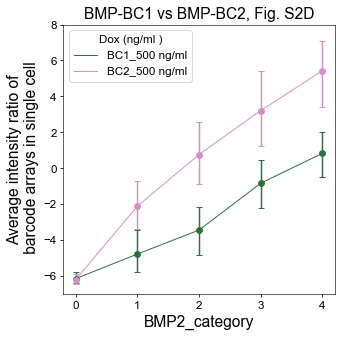

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a custom color palette with 5 colors
custom_palette = sns.color_palette("cubehelix", 2)

# Filter the DataFrames based on specified conditions
#temp_df = BMP_2_df[BMP_2_df['Dox (ng/ml )'].isin([0])].copy()
#temp_df_1 = BMP_1_df[BMP_1_df['Dox (ng/ml )'].isin([20])].copy()
temp_df_2 = BMP_1_df[BMP_1_df['Dox (ng/ml )'].isin([0,500])].copy()
#temp_df_3 = BMP_2_df[BMP_2_df['Dox (ng/ml )'].isin([20])].copy()
temp_df_4 = BMP_2_df[BMP_2_df['Dox (ng/ml )'].isin([0,500])].copy()

plt.figure(figsize=(5, 5), dpi=70)

# Custom estimator function to calculate the median
def median_func(y):
    return np.median(y)

# Functions to calculate the 25th and 75th percentiles (IQR)
def iqr_lower(y):
    return np.percentile(y, 25)

def iqr_upper(y):
    return np.percentile(y, 75)

# Define a list of DataFrames and labels for plotting
data_frames = [#(temp_df, '0 ng/ml'), 
                #(temp_df_1, 'BC1_20 ng/ml'), 
                (temp_df_2, 'BC1_500 ng/ml'), 
                #(temp_df_3, 'BC2_20 ng/ml'),
                (temp_df_4, 'BC2_500 ng/ml')]

# Plot each DataFrame with median and IQR error bars
for i, (df, label) in enumerate(data_frames):
    # Plot median points with error bars representing IQR
    sns.lineplot(x='BMP2_category', 
                 y='int_diff mean', 
                 data=df, 
                 color=custom_palette[i],
                 estimator=median_func,
                 #errorbar=('ci', 95),
                 errorbar= None,
                 linewidth=1,
                 markersize=6,
                 #zorder=3,
                 label=label)

    # Calculate medians and IQR for the current DataFrame
    grouped = df.groupby('BMP2_category')['int_diff mean']
    medians = grouped.median()
    iqr_lowers = grouped.quantile(0.25)
    iqr_uppers = grouped.quantile(0.75)

    plt.errorbar(medians.index, medians, yerr=[medians - iqr_lowers, iqr_uppers - medians],
                 fmt='o', color=custom_palette[i], capsize=3, capthick=1, ecolor=custom_palette[i])
#plt.xscale('log', base=2)
plt.ylim([-7, 8])
#plt.xlim([-0.3, 4.3])
plt.title('BMP-BC1 vs BMP-BC2, Fig. S2D')
plt.xlabel('BMP2_category')
plt.ylabel('Average intensity ratio of\n barcode arrays in single cell')
plt.legend(title='Dox (ng/ml )', bbox_to_anchor=(0, 1), loc='upper left')
#plt.gca().margins(x=0.08)
plt.gca().spines['bottom'].set_linewidth(0.625)
plt.gca().spines['left'].set_linewidth(0.625)
plt.gca().spines['right'].set_linewidth(0.625)
plt.gca().spines['top'].set_linewidth(0.625)
#save_path = os.path.join(data_dir, f'dBMPRsg16_vs17_BMP_dosage_int_diff_median&IQR.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()